# Problem Statement

<font color=darkblue>In business, it is crucial to understand customers'needs and desire in order to provide optimize their customer journey and maximize their potential value to our business. In order to do so, we firstly need to segment our customers into groups that share something in common. With that, only we are able to curate products and services that cater to their needs.<br><br>
Conventional method practice of customer segmentation includes using RFM analysis, customers are assigned a ranking number of 1,2,3,4, or 5 (with 5 being highest) for each RFM parameter. The three scores together are referred to as an RFM "cell" . The database is sorted to determine which customers were "the best customers" in the past, with a cell ranking of "555" being ideal.<br><br>
However, in this project uses unsupervised machine learning approach ie DBSCan,KMean clsutering to segment customers into different groups using other features on top of based on customers RFM score .

# Import Library

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import math
import os
import pydotplus
from IPython.display import Image  
from datetime import datetime

pd.options.display.float_format = '{:.2f}'.format

from datetime import datetime
from datetime import timedelta 

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans,DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score,davies_bouldin_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs, make_moons
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist
from scipy import stats



from sklearn.decomposition import PCA, NMF

%matplotlib inline
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 5000)



from sklearn import tree
import graphviz

<font color=darkblue> Click here to [here](./Data_Cleaning.ipynb) for Data Cleaning Notebook and [here](./EDA.ipynb) for EDA.

# Import Cleaned Transactional Data

In [2]:
# Read Cleaned DataFrame
customer_feat=pd.read_csv('../datasets/customer_feat.csv')
customer_feat=customer_feat.drop(columns=['Last_Purchase_Date','First_Purchase_Date','Customer_Country_Belgium','Customer_Country_France','Customer_Country_Germany','Customer_Country_Italy','Customer_Country_Netherlands','Customer_Country_Other Countries','Customer_Country_Portugal','Customer_Country_Spain','Customer_Country_Sweden','Customer_Country_Switzerland','Customer_Country_United Kingdom'])
customer_feat.set_index('Customer ID',inplace=True)
customer_feat.head()

,No_of_Months_Transac,Total_Qty,Number_of_Item_Types,Max_Item_UnitPrice,Min_Item_UnitPrice,Median_Item_UnitPrice,Avg_Transaction_Per_Mth,Avg_Spending_Per_Mth,Ratio_Transaction_Per_Unique_Mth,Ratio_Spending_Per_Unique_Mth,Avg_Spending_Per_Inv,Avg_Purchase_Qty_Per_Inv,Avg_Item_Types_Per_Inv,Recency,Frequency,Monetary,Tenure
Customer ID,,,,,,,,,,,,,,,,,
12346.00,5,74285,26,7.49,1.00,7.49,0.48,3102.26,2.40,15511.29,6463.04,6190.42,2.17,326,12,77556.46,726
12347.00,8,2967,126,12.75,0.25,1.95,0.32,196.86,1.00,615.19,615.19,370.88,15.75,3,8,4921.53,405
12348.00,5,2714,28,40.00,0.29,0.55,0.20,80.78,1.00,403.88,403.88,542.80,5.60,76,5,2019.40,439
12349.00,4,1624,145,300.00,0.42,2.55,0.16,177.15,1.00,1107.17,1107.17,406.00,36.25,19,4,4428.69,590
12350.00,1,197,17,40.00,0.85,1.65,0.04,13.38,1.00,334.40,334.40,197.00,17.00,311,1,334.40,311


In [3]:
# def boxcox_df(x):
#     x_boxcox,_=stats.boxcox(x)
#     return x_boxcox

In [4]:
# #col_not_log=['Customer ID',]
# customer_feat_to_log=customer_feat[[c for c in customer_feat if c not in col_not_log]]
# customer_feat_to_log.head()

In [5]:
customer_feat_log=np.log(customer_feat)
customer_feat_log.head()

,No_of_Months_Transac,Total_Qty,Number_of_Item_Types,Max_Item_UnitPrice,Min_Item_UnitPrice,Median_Item_UnitPrice,Avg_Transaction_Per_Mth,Avg_Spending_Per_Mth,Ratio_Transaction_Per_Unique_Mth,Ratio_Spending_Per_Unique_Mth,Avg_Spending_Per_Inv,Avg_Purchase_Qty_Per_Inv,Avg_Item_Types_Per_Inv,Recency,Frequency,Monetary,Tenure
Customer ID,,,,,,,,,,,,,,,,,
12346.00,1.61,11.22,3.26,2.01,0.00,2.01,-0.73,8.04,0.88,9.65,8.77,8.73,0.77,5.79,2.48,11.26,6.59
12347.00,2.08,8.00,4.84,2.55,-1.39,0.67,-1.14,5.28,0.00,6.42,6.42,5.92,2.76,1.10,2.08,8.50,6.00
12348.00,1.61,7.91,3.33,3.69,-1.24,-0.60,-1.61,4.39,0.00,6.00,6.00,6.30,1.72,4.33,1.61,7.61,6.08
12349.00,1.39,7.39,4.98,5.70,-0.87,0.94,-1.83,5.18,0.00,7.01,7.01,6.01,3.59,2.94,1.39,8.40,6.38
12350.00,0.00,5.28,2.83,3.69,-0.16,0.50,-3.22,2.59,0.00,5.81,5.81,5.28,2.83,5.74,0.00,5.81,5.74


In [6]:
# dummy_var=customer_feat[['Customer ID','Customer_Country_Belgium','Customer_Country_France','Customer_Country_Germany','Customer_Country_Italy','Customer_Country_Netherlands','Customer_Country_Other Countries','Customer_Country_Portugal','Customer_Country_Spain','Customer_Country_Sweden','Customer_Country_Switzerland','Customer_Country_United Kingdom']]
# dummy_var.head()

In [7]:
# customer_feat_normalized=pd.concat([customer_feat_log,dummy_var],axis=1)
# customer_feat_normalized.head()

In [8]:
# # rearrange Tenure to the last column 
# col_first=['Customer ID']
# customer_feat_normalized=customer_feat_normalized[[c for c in col_first]+[c for c in customer_feat_normalized.columns if c not in col_first]]
# customer_feat_normalized.head(2)

In [9]:
# customer_feat_normalized.set_index('Customer ID',inplace=True)
# customer_feat_normalized.head()

In [10]:
# Applying K-Means Clustering Algorithm to Customer Features
# define X
X=customer_feat_log

In [11]:
#Feature Scaling
sc= StandardScaler()
X_sc= sc.fit_transform(X)

In [12]:
X_sc.shape

(5878, 17)

## Elbow Method & Silhouette_Score to get Best K Value

<font color=darkblue> There's no 'correct' value for K Value,it depends of the subject matter or domain knowledge to determine the best K Value for each circumstances.<br>
We will use Silhoutte Score and Elbow Method to determine the range of K value to be fitted in to KMeans to observe clusters formed and choose the most appropriate K value. 

For n_clusters = 2 The average silhouette_score is : 0.2759818102326061
For n_clusters = 3 The average silhouette_score is : 0.20024569820198795
For n_clusters = 4 The average silhouette_score is : 0.1650051012846121
For n_clusters = 5 The average silhouette_score is : 0.1697411614118123
For n_clusters = 6 The average silhouette_score is : 0.16952220748768654
For n_clusters = 7 The average silhouette_score is : 0.16948792554982245
For n_clusters = 8 The average silhouette_score is : 0.16385802914726355
For n_clusters = 9 The average silhouette_score is : 0.1535704343421484
For n_clusters = 10 The average silhouette_score is : 0.14763973402285901


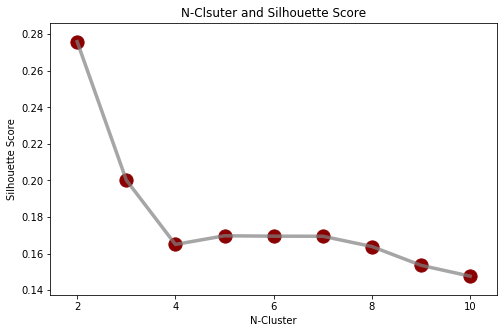

In [13]:
sils=[]

for k in range(2,11):
    km=KMeans(init='k-means++', n_clusters = k, n_init=100,random_state=101)
    km.fit(X_sc)
    sils.append(silhouette_score(X_sc,km.labels_,metric='euclidean'))
    silhouette_avg = silhouette_score(X_sc,km.labels_)
    print("For n_clusters =", k, "The average silhouette_score is :", silhouette_avg)

    
fig,ax=plt.subplots(figsize=(8,5))
ax.plot(range(2,11),sils,c='grey',lw=3.5,alpha=0.7)
ax.scatter(range(2,11),sils,c='darkred',s=175)

plt.title('N-Clsuter and Silhouette Score')
plt.xlabel('N-Cluster')
plt.ylabel('Silhouette Score')
plt.show()

For n_clusters = 2 The wcss is : 68948.46372966885
For n_clusters = 3 The wcss is : 59454.77911473549
For n_clusters = 4 The wcss is : 54121.18405559172
For n_clusters = 5 The wcss is : 50074.470000384186
For n_clusters = 6 The wcss is : 46831.08927159246
For n_clusters = 7 The wcss is : 43891.434006938034
For n_clusters = 8 The wcss is : 41346.33460224515
For n_clusters = 9 The wcss is : 39905.337633052935
For n_clusters = 10 The wcss is : 38534.1547812156


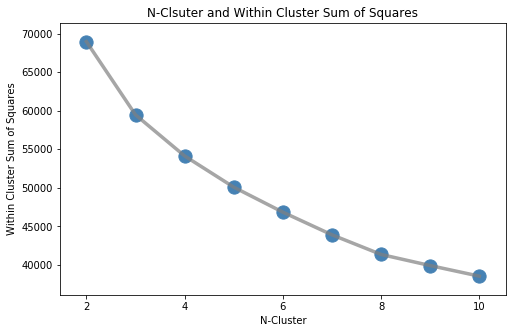

In [14]:
wcss=[]

for k in range(2,11):
    km=KMeans(init='k-means++', n_clusters = k, n_init=100,random_state=101)
    km.fit(X_sc)
    wcss.append(km.inertia_)
    
    print("For n_clusters =", k, "The wcss is :", km.inertia_)
    
fig, ax=plt.subplots(figsize=(8,5))
ax.plot(range(2,11),wcss,c='grey',lw=3.5,alpha=0.7)
ax.scatter(range(2,11),wcss,c='steelblue',s=175)
plt.title('N-Clsuter and Within Cluster Sum of Squares')
plt.xlabel('N-Cluster')
plt.ylabel('Within Cluster Sum of Squares')

plt.show()

In [15]:
scores = []
for k in range(2, 11):
    cl = KMeans(init='k-means++', n_clusters = k, n_init=100,random_state=101)
    cl.fit(X_sc)
    inertia = cl.inertia_
    
    sil = silhouette_score(X_sc, cl.labels_)
    scores.append([k, inertia, sil])
    
score_df = pd.DataFrame(scores)
score_df.columns = ['k', 'inertia', 'silhouette']
score_df

,k,inertia,silhouette
0,2,68948.46,0.28
1,3,59454.78,0.20
2,4,54121.18,0.17
3,5,50074.47,0.17
4,6,46831.09,0.17
5,7,43891.43,0.17
6,8,41346.33,0.16
7,9,39905.34,0.15
8,10,38534.15,0.15


### Fitting K= 3 in to KMeans

In [16]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 3, init = 'k-means++',random_state=101)
label = km.fit_predict(X_sc)

In [17]:
datadf_3=customer_feat.copy()
datadf_3['Cluster']=label
datadf_3.head()

,No_of_Months_Transac,Total_Qty,Number_of_Item_Types,Max_Item_UnitPrice,Min_Item_UnitPrice,Median_Item_UnitPrice,Avg_Transaction_Per_Mth,Avg_Spending_Per_Mth,Ratio_Transaction_Per_Unique_Mth,Ratio_Spending_Per_Unique_Mth,Avg_Spending_Per_Inv,Avg_Purchase_Qty_Per_Inv,Avg_Item_Types_Per_Inv,Recency,Frequency,Monetary,Tenure,Cluster
Customer ID,,,,,,,,,,,,,,,,,,
12346.00,5,74285,26,7.49,1.00,7.49,0.48,3102.26,2.40,15511.29,6463.04,6190.42,2.17,326,12,77556.46,726,0
12347.00,8,2967,126,12.75,0.25,1.95,0.32,196.86,1.00,615.19,615.19,370.88,15.75,3,8,4921.53,405,0
12348.00,5,2714,28,40.00,0.29,0.55,0.20,80.78,1.00,403.88,403.88,542.80,5.60,76,5,2019.40,439,0
12349.00,4,1624,145,300.00,0.42,2.55,0.16,177.15,1.00,1107.17,1107.17,406.00,36.25,19,4,4428.69,590,0
12350.00,1,197,17,40.00,0.85,1.65,0.04,13.38,1.00,334.40,334.40,197.00,17.00,311,1,334.40,311,2


In [18]:
centroids=pd.DataFrame(sc.inverse_transform(km.cluster_centers_),columns=['No_of_Months_Transac', 'Total_Qty',
       'Number_of_Item_Types', 'Max_Item_UnitPrice', 'Min_Item_UnitPrice',
       'Median_Item_UnitPrice', 'Avg_Transaction_Per_Mth',
       'Avg_Spending_Per_Mth', 'Ratio_Transaction_Per_Unique_Mth',
       'Ratio_Spending_Per_Unique_Mth', 'Avg_Spending_Per_Inv',
       'Avg_Purchase_Qty_Per_Inv', 'Avg_Item_Types_Per_Inv', 'Recency',
       'Frequency', 'Monetary', 'Tenure'])
centroids

,No_of_Months_Transac,Total_Qty,Number_of_Item_Types,Max_Item_UnitPrice,Min_Item_UnitPrice,Median_Item_UnitPrice,Avg_Transaction_Per_Mth,Avg_Spending_Per_Mth,Ratio_Transaction_Per_Unique_Mth,Ratio_Spending_Per_Unique_Mth,Avg_Spending_Per_Inv,Avg_Purchase_Qty_Per_Inv,Avg_Item_Types_Per_Inv,Recency,Frequency,Monetary,Tenure
0,2.09,7.80,4.90,3.06,-1.51,0.68,-0.81,5.16,0.32,6.29,5.97,5.39,2.49,3.26,2.41,8.38,6.33
1,0.27,4.29,2.13,2.06,-0.06,1.00,-2.89,1.98,0.06,4.93,4.87,3.96,1.80,5.43,0.33,5.20,5.75
2,0.74,6.04,3.71,2.53,-1.09,0.66,-2.39,3.36,0.09,5.83,5.74,5.21,2.88,4.72,0.83,6.57,5.75


In [19]:
grouped_clustter_k3=datadf_3.groupby(['Cluster']).agg({'Cluster':'count',
                                                    'No_of_Months_Transac':'mean',
                                                    'Total_Qty':'mean',
                                                    'Number_of_Item_Types':'mean',
                                                    'Max_Item_UnitPrice':'mean',
                                                    'Min_Item_UnitPrice':'mean',
                                                    'Median_Item_UnitPrice':'mean',
                                                    'Avg_Transaction_Per_Mth':'mean',
                                                    'Avg_Spending_Per_Mth':'mean',
                                                    'Ratio_Transaction_Per_Unique_Mth':'mean',
                                                    'Ratio_Spending_Per_Unique_Mth':'mean',                                                    
                                                    'Avg_Spending_Per_Inv':'mean',
                                                    'Avg_Purchase_Qty_Per_Inv':'mean',
                                                    'Avg_Item_Types_Per_Inv':'mean',
                                                    'Recency':'mean',
                                                    'Frequency':'mean',
                                                    'Monetary':'mean',
                                                    'Tenure':'mean'
                                                    })                                                                                           
                                                                                                      
grouped_clustter_k3.rename(columns={'Cluster':'Number of Customer'},inplace=True)                                                 
grouped_clustter_k3

,Number of Customer,No_of_Months_Transac,Total_Qty,Number_of_Item_Types,Max_Item_UnitPrice,Min_Item_UnitPrice,Median_Item_UnitPrice,Avg_Transaction_Per_Mth,Avg_Spending_Per_Mth,Ratio_Transaction_Per_Unique_Mth,Ratio_Spending_Per_Unique_Mth,Avg_Spending_Per_Inv,Avg_Purchase_Qty_Per_Inv,Avg_Item_Types_Per_Inv,Recency,Frequency,Monetary,Tenure
Cluster,,,,,,,,,,,,,,,,,,
0,1810,9.33,4926.96,183.90,68.78,0.28,2.45,0.60,324.13,1.49,863.07,555.14,390.94,16.25,65.71,15.11,8103.20,599.80
1,1345,1.50,110.00,12.47,35.11,20.47,25.29,0.07,10.29,1.08,191.07,171.15,74.84,9.30,349.24,1.64,257.13,418.49
2,2723,2.46,531.84,53.09,17.50,0.42,2.17,0.11,34.70,1.12,411.52,377.93,237.56,23.14,219.58,2.72,867.49,420.52


In [20]:
data_normalized=pd.DataFrame(X_sc,
                            index=customer_feat.index,
                            columns=customer_feat.columns)
data_normalized['Cluster']=datadf_3['Cluster']
data_normalized.head()

,No_of_Months_Transac,Total_Qty,Number_of_Item_Types,Max_Item_UnitPrice,Min_Item_UnitPrice,Median_Item_UnitPrice,Avg_Transaction_Per_Mth,Avg_Spending_Per_Mth,Ratio_Transaction_Per_Unique_Mth,Ratio_Spending_Per_Unique_Mth,Avg_Spending_Per_Inv,Avg_Purchase_Qty_Per_Inv,Avg_Item_Types_Per_Inv,Recency,Frequency,Monetary,Tenure,Cluster
Customer ID,,,,,,,,,,,,,,,,,,
12346.00,0.62,3.27,-0.35,-0.59,0.98,2.04,1.25,3.20,2.69,4.77,4.27,3.92,-1.81,0.85,1.25,3.20,0.74,0
12347.00,1.15,1.18,0.85,-0.04,-0.40,-0.12,0.85,1.21,-0.57,0.81,1.09,0.98,0.26,-2.09,0.85,1.21,0.09,0
12348.00,0.62,1.12,-0.29,1.14,-0.25,-2.16,0.40,0.57,-0.57,0.29,0.53,1.38,-0.82,-0.06,0.40,0.57,0.18,0
12349.00,0.38,0.79,0.96,3.22,0.12,0.31,0.18,1.14,-0.57,1.53,1.89,1.07,1.12,-0.93,0.18,1.14,0.51,0
12350.00,-1.17,-0.58,-0.67,1.14,0.81,-0.39,-1.17,-0.72,-0.57,0.06,0.27,0.32,0.33,0.82,-1.17,-0.72,-0.21,2


In [21]:
customer_feat_k3data_melt=pd.melt(data_normalized.reset_index(),
                 id_vars=['Customer ID','Cluster'],
                 value_vars=['No_of_Months_Transac', 'Total_Qty',
       'Number_of_Item_Types', 'Max_Item_UnitPrice', 'Min_Item_UnitPrice',
       'Median_Item_UnitPrice', 'Avg_Transaction_Per_Mth',
       'Avg_Spending_Per_Mth', 'Ratio_Transaction_Per_Unique_Mth',
       'Ratio_Spending_Per_Unique_Mth', 'Avg_Spending_Per_Inv',
       'Avg_Purchase_Qty_Per_Inv', 'Avg_Item_Types_Per_Inv', 'Recency',
       'Frequency', 'Monetary', 'Tenure'],
                 var_name='Attribute',
                  value_name='Value')
customer_feat_k3data_melt.head()

,Customer ID,Cluster,Attribute,Value
0,12346.00,0,No_of_Months_Transac,0.62
1,12347.00,0,No_of_Months_Transac,1.15
2,12348.00,0,No_of_Months_Transac,0.62
3,12349.00,0,No_of_Months_Transac,0.38
4,12350.00,2,No_of_Months_Transac,-1.17


snake plot
- Market Research technque to compare different segments
- Visual representation of each segments attributes
- Need to first normalize data (center and scaled)
- Plot each cluster's average normalized values of each attributes

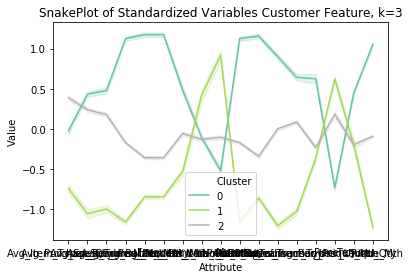

In [22]:
plt.title('SnakePlot of Standardized Variables Customer Feature, k=3')
customer_feat_k3=sns.lineplot(x='Attribute',y='Value',hue='Cluster',data=customer_feat_k3data_melt,legend='full',palette='Set2')

In [23]:
cluster_avg=datadf_3.groupby(['Cluster']).mean()
population_avg=datadf_3.mean()
customer_feat_k3_relative_imp=(cluster_avg/population_avg)-1

the further a ratio is from 0, the more important that attribute is for a segment relative to the total population


In [24]:
customer_feat_k3_relative_imp.round(2)
customer_feat_k3_relative_imp.drop('Cluster',axis=1,inplace=True)

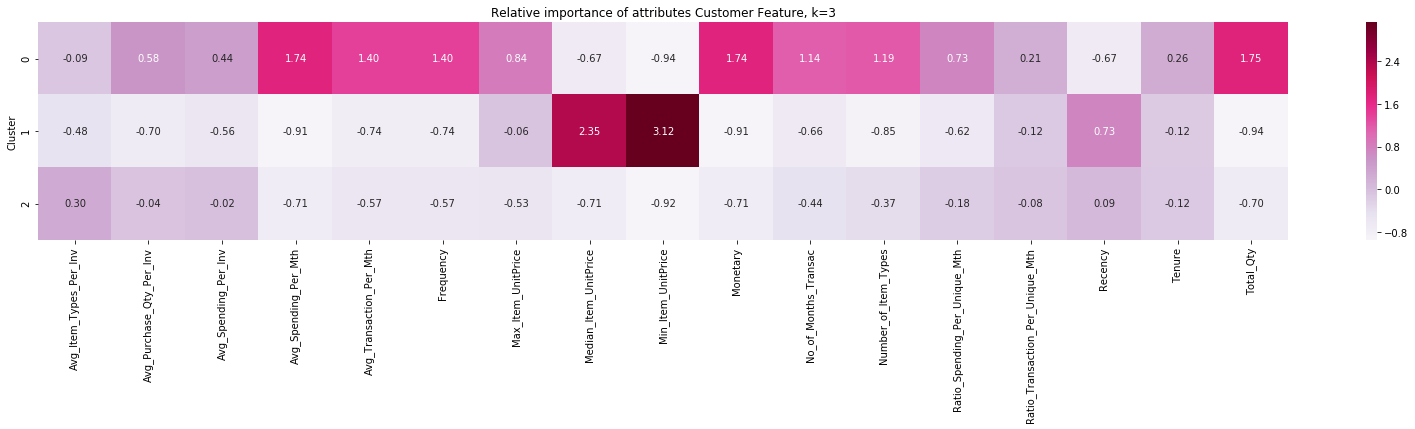

In [25]:
plt.figure(figsize=(28,4))
plt.title('Relative importance of attributes Customer Feature, k=3')
sns.heatmap(data=customer_feat_k3_relative_imp,annot=True,
           fmt='.2f',cmap='PuRd');

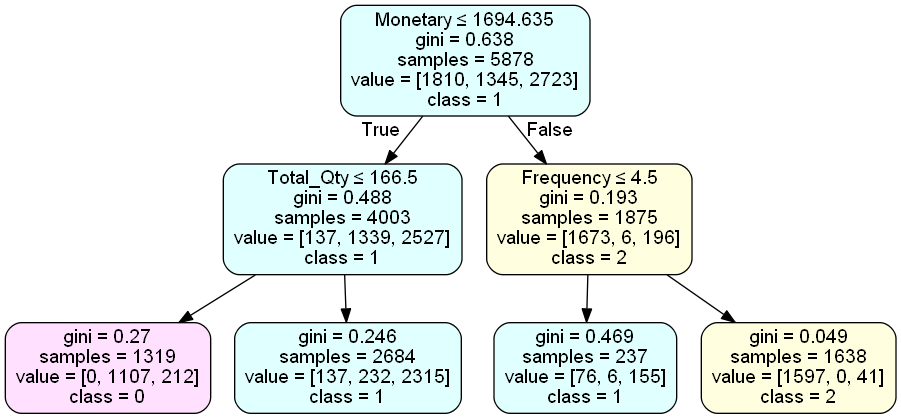

In [26]:
datadf_3['Cluster']=datadf_3["Cluster"].apply(str)

dt = tree.DecisionTreeClassifier(random_state = 101,max_depth=2)  
dt = dt.fit(datadf_3.iloc[:,1:17],datadf_3.iloc[:,17])

import pydotplus  
dot_data = tree.export_graphviz(dt, out_file=None)  
graph2 = pydotplus.graph_from_dot_data(dot_data)  
graph2.write_pdf("../tree/tree.pdf")  

from IPython.display import Image  
dot_data = tree.export_graphviz(dt, out_file=None,  
                     feature_names=list(datadf_3.iloc[:,1:17].columns),
                     class_names=list(set(datadf_3['Cluster'].values)),
                     filled=True, rounded=True,  # leaves_parallel=True, 
                     special_characters=True)  
graph2 = pydotplus.graph_from_dot_data(dot_data)

## Color of nodes
nodes = graph2.get_node_list()

for node in nodes:
    if node.get_label():
        values = [int(ii) for ii in node.get_label().split('value = [')[1].split(']')[0].split(',')];
        color = {0: [255,255,224], 1: [255,224,255], 2: [224,255,255],}
        values = color[values.index(max(values))]; # print(values)
        color = '#{:02x}{:02x}{:02x}'.format(values[0], values[1], values[2]); # print(color)
        node.set_fillcolor(color )

Image(graph2.create_png() ) 

### Fitting K= 4 in to KMeans

In [27]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 4, init = 'k-means++',random_state=101)
label = km.fit_predict(X_sc)

In [28]:
datadf_4=customer_feat.copy()
datadf_4['Cluster']=label
datadf_4.head()

,No_of_Months_Transac,Total_Qty,Number_of_Item_Types,Max_Item_UnitPrice,Min_Item_UnitPrice,Median_Item_UnitPrice,Avg_Transaction_Per_Mth,Avg_Spending_Per_Mth,Ratio_Transaction_Per_Unique_Mth,Ratio_Spending_Per_Unique_Mth,Avg_Spending_Per_Inv,Avg_Purchase_Qty_Per_Inv,Avg_Item_Types_Per_Inv,Recency,Frequency,Monetary,Tenure,Cluster
Customer ID,,,,,,,,,,,,,,,,,,
12346.00,5,74285,26,7.49,1.00,7.49,0.48,3102.26,2.40,15511.29,6463.04,6190.42,2.17,326,12,77556.46,726,0
12347.00,8,2967,126,12.75,0.25,1.95,0.32,196.86,1.00,615.19,615.19,370.88,15.75,3,8,4921.53,405,0
12348.00,5,2714,28,40.00,0.29,0.55,0.20,80.78,1.00,403.88,403.88,542.80,5.60,76,5,2019.40,439,2
12349.00,4,1624,145,300.00,0.42,2.55,0.16,177.15,1.00,1107.17,1107.17,406.00,36.25,19,4,4428.69,590,0
12350.00,1,197,17,40.00,0.85,1.65,0.04,13.38,1.00,334.40,334.40,197.00,17.00,311,1,334.40,311,1


In [29]:
centroids=pd.DataFrame(sc.inverse_transform(km.cluster_centers_),columns=['No_of_Months_Transac', 'Total_Qty',
       'Number_of_Item_Types', 'Max_Item_UnitPrice', 'Min_Item_UnitPrice',
       'Median_Item_UnitPrice', 'Avg_Transaction_Per_Mth',
       'Avg_Spending_Per_Mth', 'Ratio_Transaction_Per_Unique_Mth',
       'Ratio_Spending_Per_Unique_Mth', 'Avg_Spending_Per_Inv',
       'Avg_Purchase_Qty_Per_Inv', 'Avg_Item_Types_Per_Inv', 'Recency',
       'Frequency', 'Monetary', 'Tenure'])
centroids

,No_of_Months_Transac,Total_Qty,Number_of_Item_Types,Max_Item_UnitPrice,Min_Item_UnitPrice,Median_Item_UnitPrice,Avg_Transaction_Per_Mth,Avg_Spending_Per_Mth,Ratio_Transaction_Per_Unique_Mth,Ratio_Spending_Per_Unique_Mth,Avg_Spending_Per_Inv,Avg_Purchase_Qty_Per_Inv,Avg_Item_Types_Per_Inv,Recency,Frequency,Monetary,Tenure
0,2.29,8.25,5.14,3.22,-1.62,0.66,-0.53,5.61,0.41,6.54,6.14,5.56,2.45,2.93,2.69,8.83,6.37
1,0.26,5.48,3.24,2.29,-0.92,0.64,-2.91,2.78,0.05,5.74,5.69,5.18,2.94,5.11,0.31,6.00,5.48
2,1.40,6.63,4.18,2.71,-1.23,0.70,-1.66,3.99,0.15,5.80,5.65,5.07,2.63,4.20,1.56,7.21,6.13
3,0.30,3.97,1.79,2.07,0.27,1.17,-2.85,1.84,0.06,4.75,4.69,3.60,1.42,5.44,0.37,5.06,5.81


In [30]:
grouped_clustter_k4=datadf_4.groupby(['Cluster']).agg({'Cluster':'count',
                                                    'No_of_Months_Transac':'mean',
                                                    'Total_Qty':'mean',
                                                    'Number_of_Item_Types':'mean',
                                                    'Max_Item_UnitPrice':'mean',
                                                    'Min_Item_UnitPrice':'mean',
                                                    'Median_Item_UnitPrice':'mean',
                                                    'Avg_Transaction_Per_Mth':'mean',
                                                    'Avg_Spending_Per_Mth':'mean',
                                                    'Ratio_Transaction_Per_Unique_Mth':'mean',
                                                    'Ratio_Spending_Per_Unique_Mth':'mean',                                                    
                                                    'Avg_Spending_Per_Inv':'mean',
                                                    'Avg_Purchase_Qty_Per_Inv':'mean',
                                                    'Avg_Item_Types_Per_Inv':'mean',
                                                    'Recency':'mean',
                                                    'Frequency':'mean',
                                                    'Monetary':'mean',
                                                    'Tenure':'mean'
                                                   })                                                                                           
                                                                                                      
grouped_clustter_k4.rename(columns={'Cluster':'Number of Customer'},inplace=True)                                                 
grouped_clustter_k4

,Number of Customer,No_of_Months_Transac,Total_Qty,Number_of_Item_Types,Max_Item_UnitPrice,Min_Item_UnitPrice,Median_Item_UnitPrice,Avg_Transaction_Per_Mth,Avg_Spending_Per_Mth,Ratio_Transaction_Per_Unique_Mth,Ratio_Spending_Per_Unique_Mth,Avg_Spending_Per_Inv,Avg_Purchase_Qty_Per_Inv,Avg_Item_Types_Per_Inv,Recency,Frequency,Monetary,Tenure
Cluster,,,,,,,,,,,,,,,,,,
0,1097,11.26,7243.76,228.90,97.85,0.26,2.64,0.80,475.41,1.64,1169.47,706.99,528.05,16.15,48.96,19.96,11885.34,622.09
1,1835,1.38,303.18,32.45,13.28,0.50,2.20,0.06,19.49,1.07,378.97,361.98,225.88,24.03,289.93,1.46,487.29,355.84
2,2077,4.51,932.91,84.56,21.84,0.36,2.18,0.21,62.02,1.20,385.74,330.66,200.24,18.15,141.55,5.25,1550.45,521.69
3,869,1.56,84.66,9.12,48.65,31.33,37.88,0.07,10.22,1.09,184.39,158.25,52.35,6.25,353.10,1.72,255.61,431.11


In [31]:
data_normalized=pd.DataFrame(X_sc,
                            index=customer_feat.index,
                            columns=customer_feat.columns)
data_normalized['Cluster']=datadf_4['Cluster']
data_normalized.head()

,No_of_Months_Transac,Total_Qty,Number_of_Item_Types,Max_Item_UnitPrice,Min_Item_UnitPrice,Median_Item_UnitPrice,Avg_Transaction_Per_Mth,Avg_Spending_Per_Mth,Ratio_Transaction_Per_Unique_Mth,Ratio_Spending_Per_Unique_Mth,Avg_Spending_Per_Inv,Avg_Purchase_Qty_Per_Inv,Avg_Item_Types_Per_Inv,Recency,Frequency,Monetary,Tenure,Cluster
Customer ID,,,,,,,,,,,,,,,,,,
12346.00,0.62,3.27,-0.35,-0.59,0.98,2.04,1.25,3.20,2.69,4.77,4.27,3.92,-1.81,0.85,1.25,3.20,0.74,0
12347.00,1.15,1.18,0.85,-0.04,-0.40,-0.12,0.85,1.21,-0.57,0.81,1.09,0.98,0.26,-2.09,0.85,1.21,0.09,0
12348.00,0.62,1.12,-0.29,1.14,-0.25,-2.16,0.40,0.57,-0.57,0.29,0.53,1.38,-0.82,-0.06,0.40,0.57,0.18,2
12349.00,0.38,0.79,0.96,3.22,0.12,0.31,0.18,1.14,-0.57,1.53,1.89,1.07,1.12,-0.93,0.18,1.14,0.51,0
12350.00,-1.17,-0.58,-0.67,1.14,0.81,-0.39,-1.17,-0.72,-0.57,0.06,0.27,0.32,0.33,0.82,-1.17,-0.72,-0.21,1


In [32]:
customer_feat_k4data_melt=pd.melt(data_normalized.reset_index(),
                 id_vars=['Customer ID','Cluster'],
                 value_vars=['No_of_Months_Transac', 'Total_Qty',
       'Number_of_Item_Types', 'Max_Item_UnitPrice', 'Min_Item_UnitPrice',
       'Median_Item_UnitPrice', 'Avg_Transaction_Per_Mth',
       'Avg_Spending_Per_Mth', 'Ratio_Transaction_Per_Unique_Mth',
       'Ratio_Spending_Per_Unique_Mth', 'Avg_Spending_Per_Inv',
       'Avg_Purchase_Qty_Per_Inv', 'Avg_Item_Types_Per_Inv', 'Recency',
       'Frequency', 'Monetary', 'Tenure'],
                 var_name='Attribute',
                  value_name='Value')
customer_feat_k4data_melt.head()

,Customer ID,Cluster,Attribute,Value
0,12346.00,0,No_of_Months_Transac,0.62
1,12347.00,0,No_of_Months_Transac,1.15
2,12348.00,2,No_of_Months_Transac,0.62
3,12349.00,0,No_of_Months_Transac,0.38
4,12350.00,1,No_of_Months_Transac,-1.17


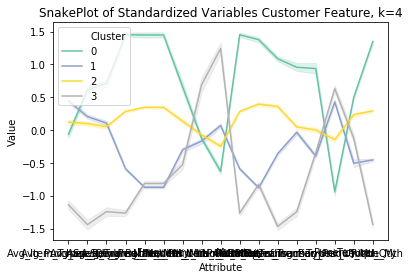

In [33]:
plt.title('SnakePlot of Standardized Variables Customer Feature, k=4')
customer_feat_k4=sns.lineplot(x='Attribute',y='Value',hue='Cluster',data=customer_feat_k4data_melt,legend='full',palette='Set2')

In [34]:
cluster_avg=datadf_4.groupby(['Cluster']).mean()
population_avg=datadf_4.mean()
customer_feat_k4_relative_imp=(cluster_avg/population_avg)-1

In [35]:
customer_feat_k4_relative_imp.round(2)
customer_feat_k4_relative_imp.drop('Cluster',axis=1,inplace=True)

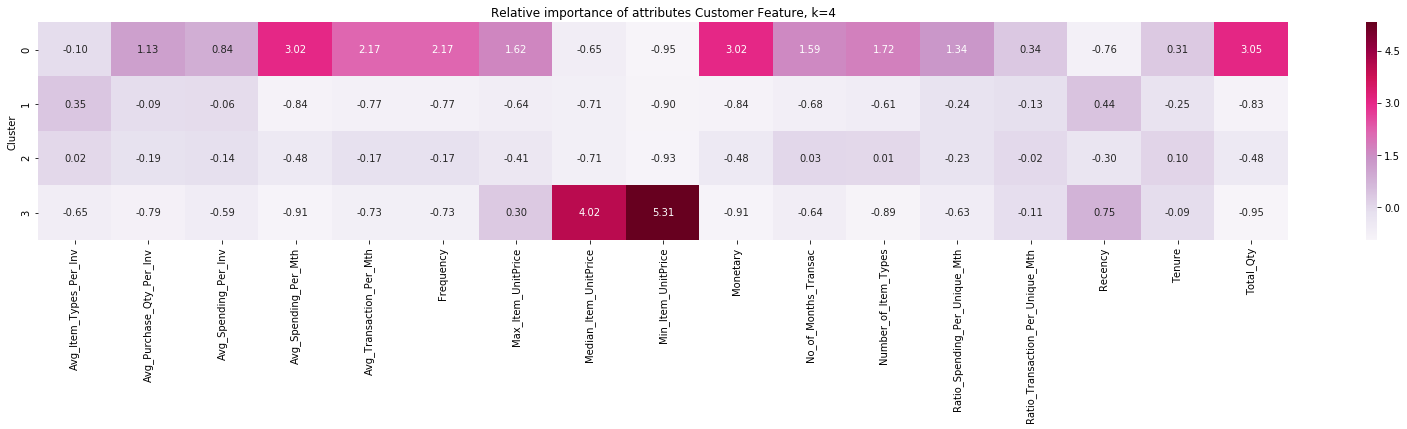

In [36]:
plt.figure(figsize=(28,4))
plt.title('Relative importance of attributes Customer Feature, k=4')
sns.heatmap(data=customer_feat_k4_relative_imp,annot=True,
           fmt='.2f',cmap='PuRd');

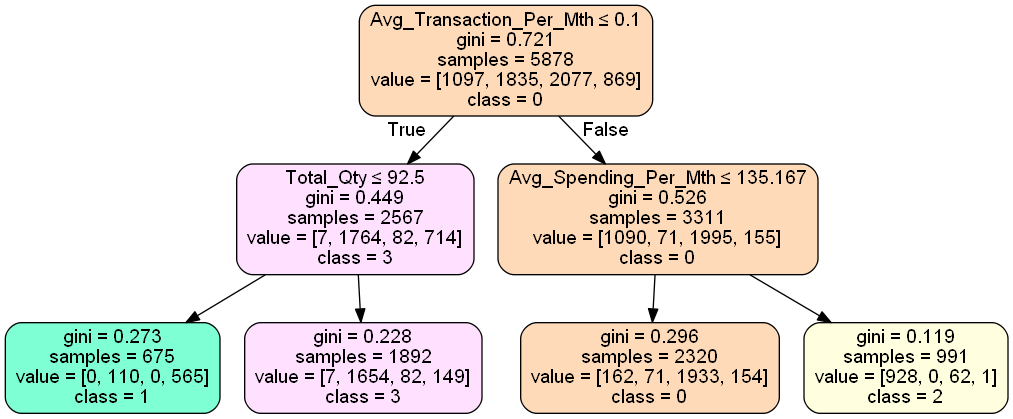

In [37]:
datadf_4['Cluster']=datadf_4["Cluster"].apply(str)

dt = tree.DecisionTreeClassifier(random_state = 101,max_depth=2)  
dt = dt.fit(datadf_4.iloc[:,1:17],datadf_4.iloc[:,17])

import pydotplus  
dot_data = tree.export_graphviz(dt, out_file=None)  
graph2 = pydotplus.graph_from_dot_data(dot_data)  
graph2.write_pdf("../tree/tree.pdf")  

from IPython.display import Image  
dot_data = tree.export_graphviz(dt, out_file=None,  
                     feature_names=list(datadf_4.iloc[:,1:17].columns),
                     class_names=list(set(datadf_4['Cluster'].values)),
                     filled=True, rounded=True,  # leaves_parallel=True, 
                     special_characters=True)  
graph2 = pydotplus.graph_from_dot_data(dot_data)

## Color of nodes
nodes = graph2.get_node_list()

for node in nodes:
    if node.get_label():
        values = [int(ii) for ii in node.get_label().split('value = [')[1].split(']')[0].split(',')];
        color = {0: [255,255,224], 1: [255,224,255], 2: [255,218,185],3: [127,255,212],}
        values = color[values.index(max(values))]; # print(values)
        color = '#{:02x}{:02x}{:02x}'.format(values[0], values[1], values[2]); # print(color)
        node.set_fillcolor(color )

Image(graph2.create_png() ) 

### Fitting K= 5 in to KMeans

In [38]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 5, init = 'k-means++',random_state=101)
label = km.fit_predict(X_sc)

In [39]:
datadf_5=customer_feat.copy()
datadf_5['Cluster']=label
datadf_5.head()

,No_of_Months_Transac,Total_Qty,Number_of_Item_Types,Max_Item_UnitPrice,Min_Item_UnitPrice,Median_Item_UnitPrice,Avg_Transaction_Per_Mth,Avg_Spending_Per_Mth,Ratio_Transaction_Per_Unique_Mth,Ratio_Spending_Per_Unique_Mth,Avg_Spending_Per_Inv,Avg_Purchase_Qty_Per_Inv,Avg_Item_Types_Per_Inv,Recency,Frequency,Monetary,Tenure,Cluster
Customer ID,,,,,,,,,,,,,,,,,,
12346.00,5,74285,26,7.49,1.00,7.49,0.48,3102.26,2.40,15511.29,6463.04,6190.42,2.17,326,12,77556.46,726,1
12347.00,8,2967,126,12.75,0.25,1.95,0.32,196.86,1.00,615.19,615.19,370.88,15.75,3,8,4921.53,405,1
12348.00,5,2714,28,40.00,0.29,0.55,0.20,80.78,1.00,403.88,403.88,542.80,5.60,76,5,2019.40,439,2
12349.00,4,1624,145,300.00,0.42,2.55,0.16,177.15,1.00,1107.17,1107.17,406.00,36.25,19,4,4428.69,590,1
12350.00,1,197,17,40.00,0.85,1.65,0.04,13.38,1.00,334.40,334.40,197.00,17.00,311,1,334.40,311,3


In [40]:
centroids=pd.DataFrame(sc.inverse_transform(km.cluster_centers_),columns=['No_of_Months_Transac', 'Total_Qty',
       'Number_of_Item_Types', 'Max_Item_UnitPrice', 'Min_Item_UnitPrice',
       'Median_Item_UnitPrice', 'Avg_Transaction_Per_Mth',
       'Avg_Spending_Per_Mth', 'Ratio_Transaction_Per_Unique_Mth',
       'Ratio_Spending_Per_Unique_Mth', 'Avg_Spending_Per_Inv',
       'Avg_Purchase_Qty_Per_Inv', 'Avg_Item_Types_Per_Inv', 'Recency',
       'Frequency', 'Monetary', 'Tenure'])
centroids

,No_of_Months_Transac,Total_Qty,Number_of_Item_Types,Max_Item_UnitPrice,Min_Item_UnitPrice,Median_Item_UnitPrice,Avg_Transaction_Per_Mth,Avg_Spending_Per_Mth,Ratio_Transaction_Per_Unique_Mth,Ratio_Spending_Per_Unique_Mth,Avg_Spending_Per_Inv,Avg_Purchase_Qty_Per_Inv,Avg_Item_Types_Per_Inv,Recency,Frequency,Monetary,Tenure
0,0.32,4.43,2.19,1.96,-0.23,0.85,-2.84,1.97,0.06,4.87,4.81,4.06,1.81,5.44,0.38,5.19,5.82
1,2.29,8.27,5.15,3.23,-1.62,0.66,-0.52,5.62,0.41,6.55,6.14,5.57,2.45,2.93,2.69,8.84,6.37
2,1.45,6.64,4.20,2.72,-1.24,0.70,-1.61,3.99,0.16,5.76,5.60,5.03,2.59,4.20,1.61,7.21,6.18
3,0.28,5.72,3.43,2.40,-0.99,0.64,-2.89,3.02,0.05,5.96,5.91,5.39,3.10,4.93,0.33,6.24,5.38
4,0.03,0.82,0.21,4.81,4.19,4.66,-3.02,2.21,0.17,5.40,5.23,0.61,0.01,5.93,0.20,5.43,5.98


In [41]:
grouped_clustter_k5=datadf_5.groupby(['Cluster']).agg({'Cluster':'count',
                                                    'No_of_Months_Transac':'mean',
                                                    'Total_Qty':'mean',
                                                    'Number_of_Item_Types':'mean',
                                                    'Max_Item_UnitPrice':'mean',
                                                    'Min_Item_UnitPrice':'mean',
                                                    'Median_Item_UnitPrice':'mean',
                                                    'Avg_Transaction_Per_Mth':'mean',
                                                    'Avg_Spending_Per_Mth':'mean',
                                                    'Ratio_Transaction_Per_Unique_Mth':'mean',
                                                    'Ratio_Spending_Per_Unique_Mth':'mean',                                                    
                                                    'Avg_Spending_Per_Inv':'mean',
                                                    'Avg_Purchase_Qty_Per_Inv':'mean',
                                                    'Avg_Item_Types_Per_Inv':'mean',
                                                    'Recency':'mean',
                                                    'Frequency':'mean',
                                                    'Monetary':'mean',
                                                    'Tenure':'mean'
                                                   })                                                                                           
                                                                                                      
grouped_clustter_k5.rename(columns={'Cluster':'Number of Customer'},inplace=True)                                                 
grouped_clustter_k5

,Number of Customer,No_of_Months_Transac,Total_Qty,Number_of_Item_Types,Max_Item_UnitPrice,Min_Item_UnitPrice,Median_Item_UnitPrice,Avg_Transaction_Per_Mth,Avg_Spending_Per_Mth,Ratio_Transaction_Per_Unique_Mth,Ratio_Spending_Per_Unique_Mth,Avg_Spending_Per_Inv,Avg_Purchase_Qty_Per_Inv,Avg_Item_Types_Per_Inv,Recency,Frequency,Monetary,Tenure
Cluster,,,,,,,,,,,,,,,,,,
0,1248,1.57,116.87,13.07,10.25,1.17,2.88,0.07,9.21,1.08,152.88,143.45,74.67,8.99,347.82,1.71,230.34,430.51
1,1082,11.28,7231.53,229.67,98.31,0.25,2.06,0.80,478.78,1.65,1126.47,681.87,436.88,16.10,48.44,20.05,11969.40,620.92
2,1964,4.70,934.66,85.91,21.76,0.36,2.18,0.22,62.10,1.20,355.81,304.11,184.18,17.15,141.00,5.49,1552.55,533.17
3,1536,1.41,460.70,39.45,15.15,0.47,2.21,0.06,26.02,1.07,484.13,458.63,343.33,27.71,261.54,1.49,650.46,335.48
4,48,1.04,5.90,1.35,712.65,541.92,642.95,0.05,73.44,1.28,1826.85,949.09,3.58,1.14,446.46,1.33,1836.11,458.88


In [42]:
data_normalized=pd.DataFrame(X_sc,
                            index=customer_feat.index,
                            columns=customer_feat.columns)
data_normalized['Cluster']=datadf_5['Cluster']
data_normalized.head()

,No_of_Months_Transac,Total_Qty,Number_of_Item_Types,Max_Item_UnitPrice,Min_Item_UnitPrice,Median_Item_UnitPrice,Avg_Transaction_Per_Mth,Avg_Spending_Per_Mth,Ratio_Transaction_Per_Unique_Mth,Ratio_Spending_Per_Unique_Mth,Avg_Spending_Per_Inv,Avg_Purchase_Qty_Per_Inv,Avg_Item_Types_Per_Inv,Recency,Frequency,Monetary,Tenure,Cluster
Customer ID,,,,,,,,,,,,,,,,,,
12346.00,0.62,3.27,-0.35,-0.59,0.98,2.04,1.25,3.20,2.69,4.77,4.27,3.92,-1.81,0.85,1.25,3.20,0.74,1
12347.00,1.15,1.18,0.85,-0.04,-0.40,-0.12,0.85,1.21,-0.57,0.81,1.09,0.98,0.26,-2.09,0.85,1.21,0.09,1
12348.00,0.62,1.12,-0.29,1.14,-0.25,-2.16,0.40,0.57,-0.57,0.29,0.53,1.38,-0.82,-0.06,0.40,0.57,0.18,2
12349.00,0.38,0.79,0.96,3.22,0.12,0.31,0.18,1.14,-0.57,1.53,1.89,1.07,1.12,-0.93,0.18,1.14,0.51,1
12350.00,-1.17,-0.58,-0.67,1.14,0.81,-0.39,-1.17,-0.72,-0.57,0.06,0.27,0.32,0.33,0.82,-1.17,-0.72,-0.21,3


In [43]:
customer_feat_k5data_melt=pd.melt(data_normalized.reset_index(),
                 id_vars=['Customer ID','Cluster'],
                 value_vars=['No_of_Months_Transac', 'Total_Qty',
       'Number_of_Item_Types', 'Max_Item_UnitPrice', 'Min_Item_UnitPrice',
       'Median_Item_UnitPrice', 'Avg_Transaction_Per_Mth',
       'Avg_Spending_Per_Mth', 'Ratio_Transaction_Per_Unique_Mth',
       'Ratio_Spending_Per_Unique_Mth', 'Avg_Spending_Per_Inv',
       'Avg_Purchase_Qty_Per_Inv', 'Avg_Item_Types_Per_Inv', 'Recency',
       'Frequency', 'Monetary', 'Tenure'],
                 var_name='Attribute',
                  value_name='Value')
customer_feat_k5data_melt.head()

,Customer ID,Cluster,Attribute,Value
0,12346.00,1,No_of_Months_Transac,0.62
1,12347.00,1,No_of_Months_Transac,1.15
2,12348.00,2,No_of_Months_Transac,0.62
3,12349.00,1,No_of_Months_Transac,0.38
4,12350.00,3,No_of_Months_Transac,-1.17


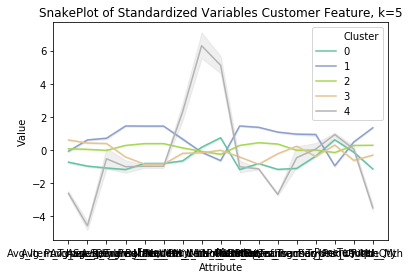

In [44]:
plt.title('SnakePlot of Standardized Variables Customer Feature, k=5')
customer_feat_k5=sns.lineplot(x='Attribute',y='Value',hue='Cluster',data=customer_feat_k5data_melt,legend='full',palette='Set2')

In [45]:
cluster_avg=datadf_5.groupby(['Cluster']).mean()
population_avg=datadf_5.mean()
customer_feat_k5_relative_imp=(cluster_avg/population_avg)-1

In [46]:
customer_feat_k5_relative_imp.round(2)
customer_feat_k5_relative_imp.drop('Cluster',axis=1,inplace=True)

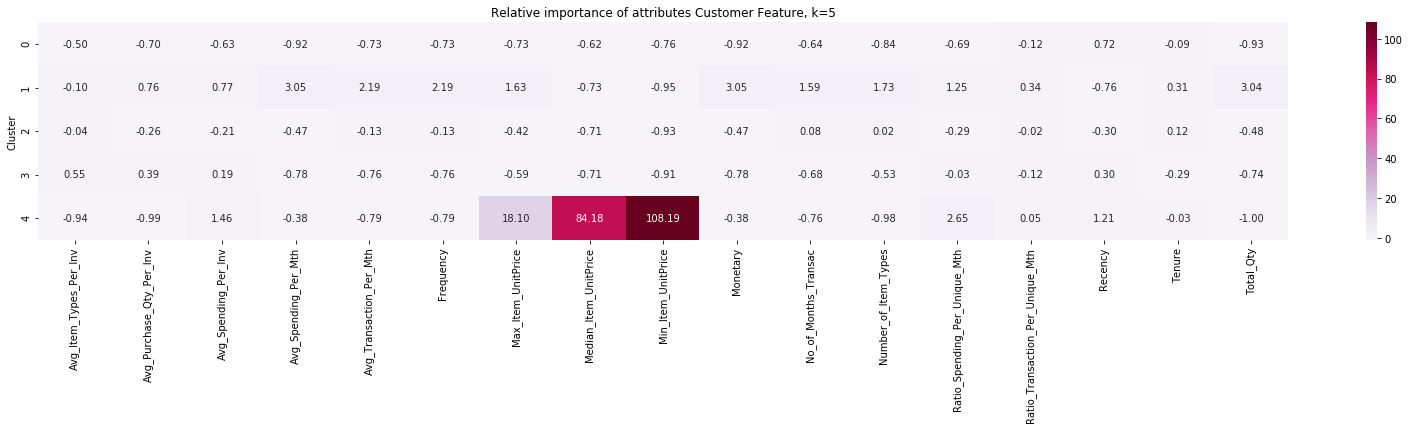

In [47]:
plt.figure(figsize=(28,4))
plt.title('Relative importance of attributes Customer Feature, k=5')
sns.heatmap(data=customer_feat_k5_relative_imp,annot=True,
           fmt='.2f',cmap='PuRd');

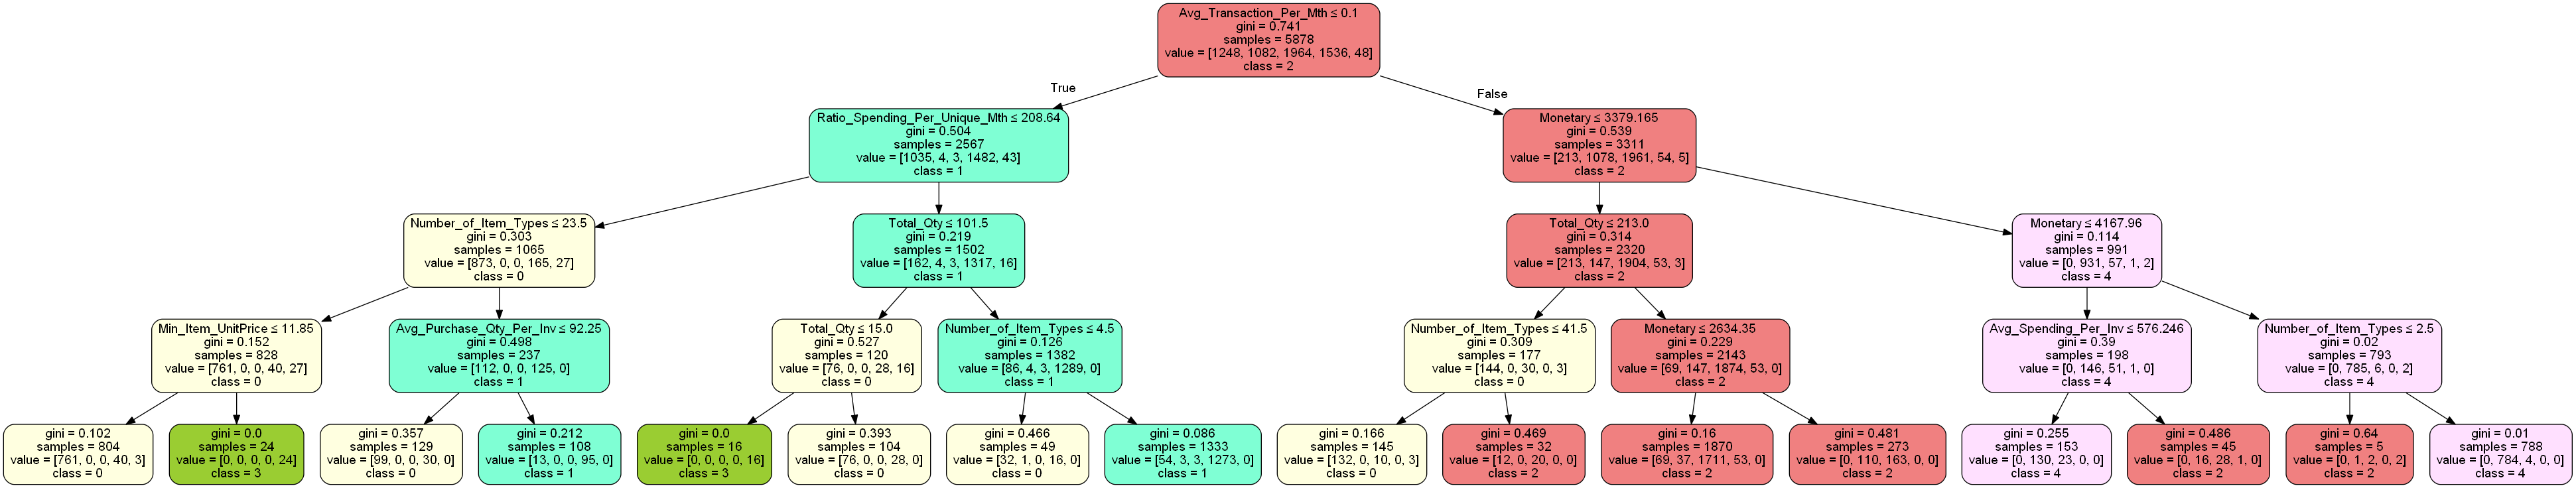

In [48]:
datadf_5['Cluster']=datadf_5["Cluster"].apply(str)

dt = tree.DecisionTreeClassifier(random_state = 101,max_depth=4)  
dt = dt.fit(datadf_5.iloc[:,1:17],datadf_5.iloc[:,17])

import pydotplus  
dot_data = tree.export_graphviz(dt, out_file=None)  
graph2 = pydotplus.graph_from_dot_data(dot_data)  
graph2.write_pdf("../tree/tree.pdf")  

from IPython.display import Image  
dot_data = tree.export_graphviz(dt, out_file=None,  
                     feature_names=list(datadf_5.iloc[:,1:17].columns),
                     class_names=list(set(datadf_5['Cluster'].values)),
                     filled=True, rounded=True,  # leaves_parallel=True, 
                     special_characters=True)  
graph2 = pydotplus.graph_from_dot_data(dot_data)

## Color of nodes
nodes = graph2.get_node_list()

for node in nodes:
    if node.get_label():
        values = [int(ii) for ii in node.get_label().split('value = [')[1].split(']')[0].split(',')];
        color = {0: [255,255,224], 1: [255,224,255], 2: [240,128,128],3: [127,255,212],4: [154,205,50],}
        values = color[values.index(max(values))]; # print(values)
        color = '#{:02x}{:02x}{:02x}'.format(values[0], values[1], values[2]); # print(color)
        node.set_fillcolor(color )

Image(graph2.create_png() ) 

### Fitting K= 6 in to KMeans

In [49]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 6, init = 'k-means++',random_state=101)
label = km.fit_predict(X_sc)

In [50]:
datadf_6=customer_feat.copy()
datadf_6['Cluster']=label
datadf_6.head()

,No_of_Months_Transac,Total_Qty,Number_of_Item_Types,Max_Item_UnitPrice,Min_Item_UnitPrice,Median_Item_UnitPrice,Avg_Transaction_Per_Mth,Avg_Spending_Per_Mth,Ratio_Transaction_Per_Unique_Mth,Ratio_Spending_Per_Unique_Mth,Avg_Spending_Per_Inv,Avg_Purchase_Qty_Per_Inv,Avg_Item_Types_Per_Inv,Recency,Frequency,Monetary,Tenure,Cluster
Customer ID,,,,,,,,,,,,,,,,,,
12346.00,5,74285,26,7.49,1.00,7.49,0.48,3102.26,2.40,15511.29,6463.04,6190.42,2.17,326,12,77556.46,726,0
12347.00,8,2967,126,12.75,0.25,1.95,0.32,196.86,1.00,615.19,615.19,370.88,15.75,3,8,4921.53,405,0
12348.00,5,2714,28,40.00,0.29,0.55,0.20,80.78,1.00,403.88,403.88,542.80,5.60,76,5,2019.40,439,4
12349.00,4,1624,145,300.00,0.42,2.55,0.16,177.15,1.00,1107.17,1107.17,406.00,36.25,19,4,4428.69,590,0
12350.00,1,197,17,40.00,0.85,1.65,0.04,13.38,1.00,334.40,334.40,197.00,17.00,311,1,334.40,311,1


In [51]:
centroids=pd.DataFrame(sc.inverse_transform(km.cluster_centers_),columns=['No_of_Months_Transac', 'Total_Qty',
       'Number_of_Item_Types', 'Max_Item_UnitPrice', 'Min_Item_UnitPrice',
       'Median_Item_UnitPrice', 'Avg_Transaction_Per_Mth',
       'Avg_Spending_Per_Mth', 'Ratio_Transaction_Per_Unique_Mth',
       'Ratio_Spending_Per_Unique_Mth', 'Avg_Spending_Per_Inv',
       'Avg_Purchase_Qty_Per_Inv', 'Avg_Item_Types_Per_Inv', 'Recency',
       'Frequency', 'Monetary', 'Tenure'])
centroids

,No_of_Months_Transac,Total_Qty,Number_of_Item_Types,Max_Item_UnitPrice,Min_Item_UnitPrice,Median_Item_UnitPrice,Avg_Transaction_Per_Mth,Avg_Spending_Per_Mth,Ratio_Transaction_Per_Unique_Mth,Ratio_Spending_Per_Unique_Mth,Avg_Spending_Per_Inv,Avg_Purchase_Qty_Per_Inv,Avg_Item_Types_Per_Inv,Recency,Frequency,Monetary,Tenure
0,2.35,8.44,5.20,3.29,-1.63,0.67,-0.42,5.80,0.45,6.66,6.22,5.64,2.40,2.85,2.80,9.01,6.39
1,0.39,5.65,3.43,2.44,-0.86,0.73,-2.77,3.03,0.05,5.85,5.80,5.20,2.98,5.70,0.45,6.25,6.12
2,0.34,4.34,2.06,1.90,-0.16,0.87,-2.82,1.90,0.06,4.78,4.72,3.94,1.66,5.45,0.40,5.12,5.87
3,0.30,5.71,3.35,2.31,-1.10,0.56,-2.81,2.93,0.11,5.86,5.74,5.30,2.94,3.25,0.41,6.15,3.91
4,1.58,6.82,4.34,2.76,-1.32,0.68,-1.48,4.17,0.16,5.81,5.65,5.08,2.60,4.00,1.74,7.38,6.23
5,0.01,0.78,0.19,4.85,4.22,4.71,-3.03,2.22,0.18,5.42,5.24,0.59,0.00,5.95,0.19,5.43,5.98


In [52]:
grouped_clustter_k6=datadf_6.groupby(['Cluster']).agg({'Cluster':'count',
                                                    'No_of_Months_Transac':'mean',
                                                    'Total_Qty':'mean',
                                                    'Number_of_Item_Types':'mean',
                                                    'Max_Item_UnitPrice':'mean',
                                                    'Min_Item_UnitPrice':'mean',
                                                    'Median_Item_UnitPrice':'mean',
                                                    'Avg_Transaction_Per_Mth':'mean',
                                                    'Avg_Spending_Per_Mth':'mean',
                                                    'Ratio_Transaction_Per_Unique_Mth':'mean',
                                                    'Ratio_Spending_Per_Unique_Mth':'mean',                                                    
                                                    'Avg_Spending_Per_Inv':'mean',
                                                    'Avg_Purchase_Qty_Per_Inv':'mean',
                                                    'Avg_Item_Types_Per_Inv':'mean',
                                                    'Recency':'mean',
                                                    'Frequency':'mean',
                                                    'Monetary':'mean',
                                                    'Tenure':'mean'})                                                                                           
                                                                                                      
grouped_clustter_k6.rename(columns={'Cluster':'Number of Customer'},inplace=True)                                                 
grouped_clustter_k6

,Number of Customer,No_of_Months_Transac,Total_Qty,Number_of_Item_Types,Max_Item_UnitPrice,Min_Item_UnitPrice,Median_Item_UnitPrice,Avg_Transaction_Per_Mth,Avg_Spending_Per_Mth,Ratio_Transaction_Per_Unique_Mth,Ratio_Spending_Per_Unique_Mth,Avg_Spending_Per_Inv,Avg_Purchase_Qty_Per_Inv,Avg_Item_Types_Per_Inv,Recency,Frequency,Monetary,Tenure
Cluster,,,,,,,,,,,,,,,,,,
0,873,12.05,8571.71,246.37,115.53,0.25,2.07,0.90,560.91,1.73,1277.54,759.04,582.68,15.64,45.85,22.40,14022.84,629.77
1,1422,1.61,376.73,38.45,15.39,0.53,2.39,0.07,25.42,1.07,423.69,401.54,243.29,24.59,371.52,1.72,635.47,487.06
2,1026,1.63,112.49,11.54,9.97,1.27,2.95,0.07,8.78,1.08,139.34,130.43,68.00,7.71,343.60,1.78,219.49,434.75
3,596,1.46,408.19,39.70,14.36,0.45,2.01,0.07,25.42,1.16,459.86,398.71,261.12,24.96,40.27,1.71,635.49,64.85
4,1914,5.33,1116.08,98.68,22.80,0.33,2.13,0.25,73.92,1.20,374.77,320.55,195.89,17.48,115.17,6.30,1848.12,545.97
5,47,1.02,5.77,1.32,727.41,553.18,656.36,0.05,74.87,1.29,1864.02,967.59,3.53,1.13,452.64,1.32,1871.79,457.43


In [53]:
data_normalized=pd.DataFrame(X_sc,
                            index=customer_feat.index,
                            columns=customer_feat.columns)
data_normalized['Cluster']=datadf_6['Cluster']
data_normalized.head()

,No_of_Months_Transac,Total_Qty,Number_of_Item_Types,Max_Item_UnitPrice,Min_Item_UnitPrice,Median_Item_UnitPrice,Avg_Transaction_Per_Mth,Avg_Spending_Per_Mth,Ratio_Transaction_Per_Unique_Mth,Ratio_Spending_Per_Unique_Mth,Avg_Spending_Per_Inv,Avg_Purchase_Qty_Per_Inv,Avg_Item_Types_Per_Inv,Recency,Frequency,Monetary,Tenure,Cluster
Customer ID,,,,,,,,,,,,,,,,,,
12346.00,0.62,3.27,-0.35,-0.59,0.98,2.04,1.25,3.20,2.69,4.77,4.27,3.92,-1.81,0.85,1.25,3.20,0.74,0
12347.00,1.15,1.18,0.85,-0.04,-0.40,-0.12,0.85,1.21,-0.57,0.81,1.09,0.98,0.26,-2.09,0.85,1.21,0.09,0
12348.00,0.62,1.12,-0.29,1.14,-0.25,-2.16,0.40,0.57,-0.57,0.29,0.53,1.38,-0.82,-0.06,0.40,0.57,0.18,4
12349.00,0.38,0.79,0.96,3.22,0.12,0.31,0.18,1.14,-0.57,1.53,1.89,1.07,1.12,-0.93,0.18,1.14,0.51,0
12350.00,-1.17,-0.58,-0.67,1.14,0.81,-0.39,-1.17,-0.72,-0.57,0.06,0.27,0.32,0.33,0.82,-1.17,-0.72,-0.21,1


In [54]:
customer_feat_k6data_melt=pd.melt(data_normalized.reset_index(),
                 id_vars=['Customer ID','Cluster'],
                 value_vars=['No_of_Months_Transac', 'Total_Qty',
       'Number_of_Item_Types', 'Max_Item_UnitPrice', 'Min_Item_UnitPrice',
       'Median_Item_UnitPrice', 'Avg_Transaction_Per_Mth',
       'Avg_Spending_Per_Mth', 'Ratio_Transaction_Per_Unique_Mth',
       'Ratio_Spending_Per_Unique_Mth', 'Avg_Spending_Per_Inv',
       'Avg_Purchase_Qty_Per_Inv', 'Avg_Item_Types_Per_Inv', 'Recency',
       'Frequency', 'Monetary', 'Tenure'],
                 var_name='Attribute',
                  value_name='Value')
customer_feat_k6data_melt.head()

,Customer ID,Cluster,Attribute,Value
0,12346.00,0,No_of_Months_Transac,0.62
1,12347.00,0,No_of_Months_Transac,1.15
2,12348.00,4,No_of_Months_Transac,0.62
3,12349.00,0,No_of_Months_Transac,0.38
4,12350.00,1,No_of_Months_Transac,-1.17


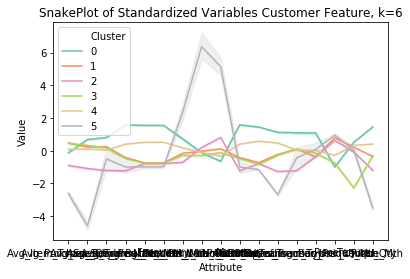

In [55]:
plt.title('SnakePlot of Standardized Variables Customer Feature, k=6')
customer_feat_k6=sns.lineplot(x='Attribute',y='Value',hue='Cluster',data=customer_feat_k6data_melt,legend='full',palette='Set2')

In [56]:
cluster_avg=datadf_6.groupby(['Cluster']).mean()
population_avg=datadf_6.mean()
customer_feat_k6_relative_imp=(cluster_avg/population_avg)-1

In [57]:
customer_feat_k6_relative_imp.round(2)
customer_feat_k6_relative_imp.drop('Cluster',axis=1,inplace=True)

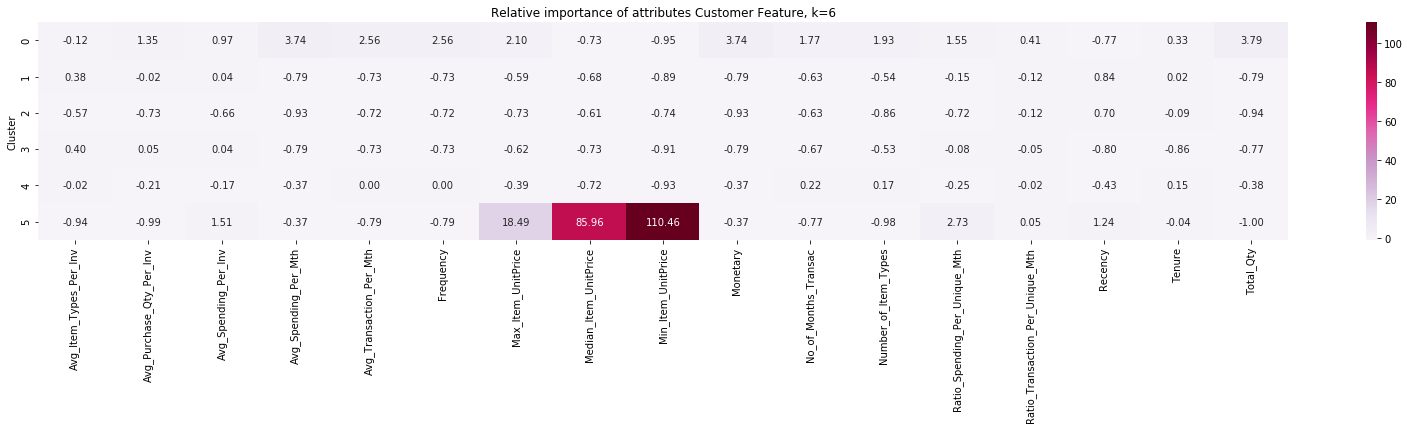

In [58]:
plt.figure(figsize=(28,4))
plt.title('Relative importance of attributes Customer Feature, k=6')
sns.heatmap(data=customer_feat_k6_relative_imp,annot=True,
           fmt='.2f',cmap='PuRd');

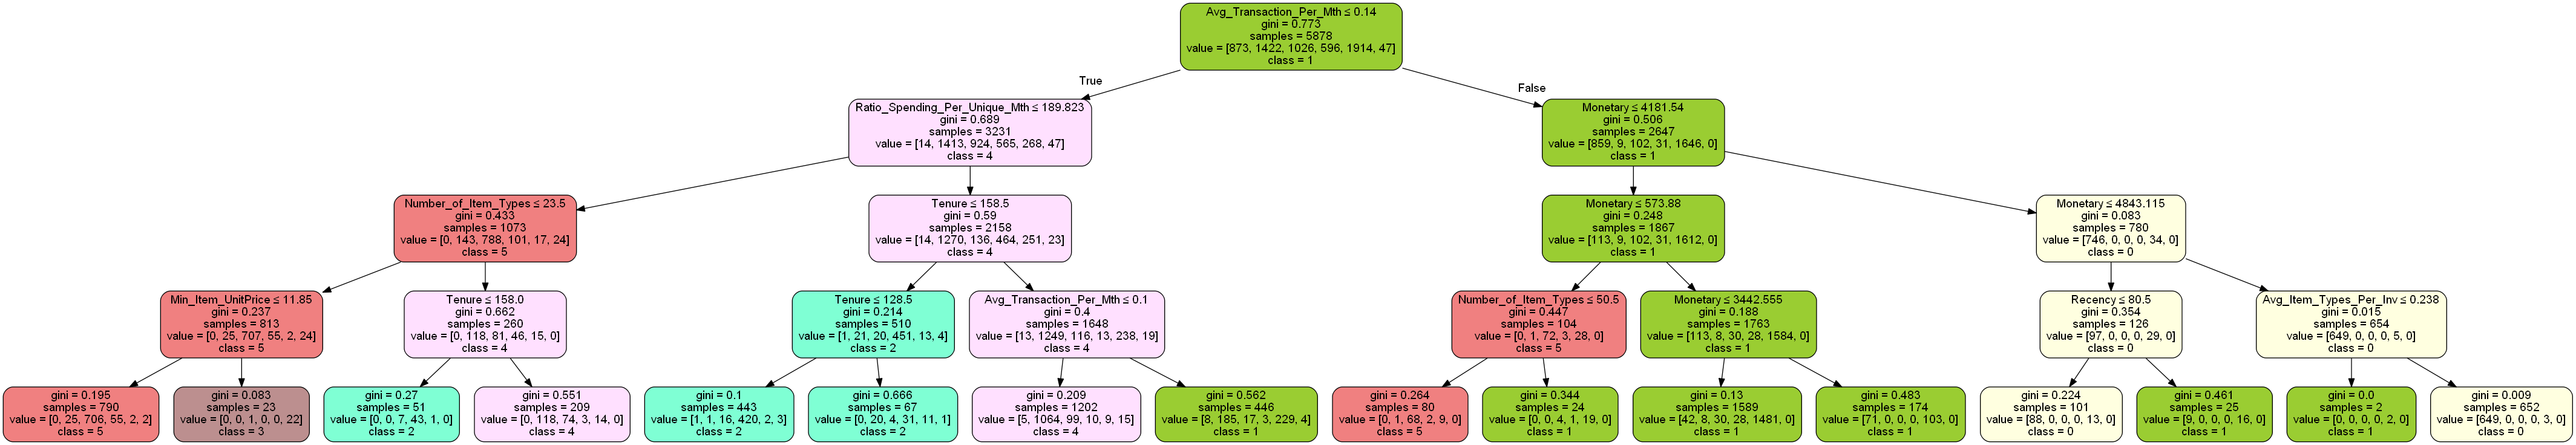

In [59]:
datadf_6['Cluster']=datadf_6["Cluster"].apply(str)

dt = tree.DecisionTreeClassifier(random_state = 101,max_depth=4)  
dt = dt.fit(datadf_6.iloc[:,1:17],datadf_6.iloc[:,17])

import pydotplus  
dot_data = tree.export_graphviz(dt, out_file=None)  
graph2 = pydotplus.graph_from_dot_data(dot_data)  
graph2.write_pdf("../tree/tree.pdf")  

from IPython.display import Image  
dot_data = tree.export_graphviz(dt, out_file=None,  
                     feature_names=list(datadf_6.iloc[:,1:17].columns),
                     class_names=list(set(datadf_6['Cluster'].values)),
                     filled=True, rounded=True,  # leaves_parallel=True, 
                     special_characters=True)  
graph2 = pydotplus.graph_from_dot_data(dot_data)

## Color of nodes
nodes = graph2.get_node_list()

for node in nodes:
    if node.get_label():
        values = [int(ii) for ii in node.get_label().split('value = [')[1].split(']')[0].split(',')];
        color = {0: [255,255,224], 1: [255,224,255], 2: [240,128,128],3: [127,255,212],4: [154,205,50],5: [188,143,143],}
        values = color[values.index(max(values))]; # print(values)
        color = '#{:02x}{:02x}{:02x}'.format(values[0], values[1], values[2]); # print(color)
        node.set_fillcolor(color )

Image(graph2.create_png() ) 

### Fitting K= 7 in to KMeans

In [60]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 7, init = 'k-means++',random_state=101)
label = km.fit_predict(X_sc)

In [61]:
datadf_7=customer_feat.copy()
datadf_7['Cluster']=label
datadf_7.head()

,No_of_Months_Transac,Total_Qty,Number_of_Item_Types,Max_Item_UnitPrice,Min_Item_UnitPrice,Median_Item_UnitPrice,Avg_Transaction_Per_Mth,Avg_Spending_Per_Mth,Ratio_Transaction_Per_Unique_Mth,Ratio_Spending_Per_Unique_Mth,Avg_Spending_Per_Inv,Avg_Purchase_Qty_Per_Inv,Avg_Item_Types_Per_Inv,Recency,Frequency,Monetary,Tenure,Cluster
Customer ID,,,,,,,,,,,,,,,,,,
12346.00,5,74285,26,7.49,1.00,7.49,0.48,3102.26,2.40,15511.29,6463.04,6190.42,2.17,326,12,77556.46,726,2
12347.00,8,2967,126,12.75,0.25,1.95,0.32,196.86,1.00,615.19,615.19,370.88,15.75,3,8,4921.53,405,2
12348.00,5,2714,28,40.00,0.29,0.55,0.20,80.78,1.00,403.88,403.88,542.80,5.60,76,5,2019.40,439,4
12349.00,4,1624,145,300.00,0.42,2.55,0.16,177.15,1.00,1107.17,1107.17,406.00,36.25,19,4,4428.69,590,0
12350.00,1,197,17,40.00,0.85,1.65,0.04,13.38,1.00,334.40,334.40,197.00,17.00,311,1,334.40,311,1


In [62]:
centroids=pd.DataFrame(sc.inverse_transform(km.cluster_centers_),columns=['No_of_Months_Transac', 'Total_Qty',
       'Number_of_Item_Types', 'Max_Item_UnitPrice', 'Min_Item_UnitPrice',
       'Median_Item_UnitPrice', 'Avg_Transaction_Per_Mth',
       'Avg_Spending_Per_Mth', 'Ratio_Transaction_Per_Unique_Mth',
       'Ratio_Spending_Per_Unique_Mth', 'Avg_Spending_Per_Inv',
       'Avg_Purchase_Qty_Per_Inv', 'Avg_Item_Types_Per_Inv', 'Recency',
       'Frequency', 'Monetary', 'Tenure'])
centroids

,No_of_Months_Transac,Total_Qty,Number_of_Item_Types,Max_Item_UnitPrice,Min_Item_UnitPrice,Median_Item_UnitPrice,Avg_Transaction_Per_Mth,Avg_Spending_Per_Mth,Ratio_Transaction_Per_Unique_Mth,Ratio_Spending_Per_Unique_Mth,Avg_Spending_Per_Inv,Avg_Purchase_Qty_Per_Inv,Avg_Item_Types_Per_Inv,Recency,Frequency,Monetary,Tenure
0,0.75,6.71,4.06,2.70,-1.19,0.63,-2.39,4.01,0.08,6.48,6.40,5.87,3.23,5.02,0.83,7.23,5.99
1,0.39,5.18,3.10,2.30,-0.73,0.76,-2.77,2.59,0.06,5.42,5.36,4.73,2.65,5.69,0.45,5.81,6.12
2,2.40,8.47,5.25,3.30,-1.65,0.66,-0.36,5.83,0.46,6.64,6.19,5.62,2.40,2.80,2.86,9.04,6.39
3,0.28,5.56,3.26,2.29,-1.05,0.58,-2.84,2.79,0.10,5.73,5.63,5.17,2.87,3.21,0.38,6.01,3.84
4,1.68,6.79,4.32,2.75,-1.30,0.70,-1.37,4.15,0.17,5.69,5.52,4.93,2.46,3.85,1.85,7.37,6.25
5,0.02,0.65,0.13,5.50,4.91,5.43,-2.96,2.80,0.24,5.99,5.75,0.38,-0.13,6.00,0.26,6.01,6.03
6,0.26,3.87,1.49,1.74,0.23,0.97,-2.91,1.56,0.05,4.51,4.47,3.56,1.18,5.38,0.31,4.77,5.74


In [63]:
grouped_clustter_k7=datadf_7.groupby(['Cluster']).agg({'Cluster':'count',
                                                    'No_of_Months_Transac':'mean',
                                                    'Total_Qty':'mean',
                                                    'Number_of_Item_Types':'mean',
                                                    'Max_Item_UnitPrice':'mean',
                                                    'Min_Item_UnitPrice':'mean',
                                                    'Median_Item_UnitPrice':'mean',
                                                    'Avg_Transaction_Per_Mth':'mean',
                                                    'Avg_Spending_Per_Mth':'mean',
                                                    'Ratio_Transaction_Per_Unique_Mth':'mean',
                                                    'Ratio_Spending_Per_Unique_Mth':'mean',                                                    
                                                    'Avg_Spending_Per_Inv':'mean',
                                                    'Avg_Purchase_Qty_Per_Inv':'mean',
                                                    'Avg_Item_Types_Per_Inv':'mean',
                                                    'Recency':'mean',
                                                    'Frequency':'mean',
                                                    'Monetary':'mean',
                                                    'Tenure':'mean'})                                                                                           
                                                                                                      
grouped_clustter_k7.rename(columns={'Cluster':'Number of Customer'},inplace=True)                                                 
grouped_clustter_k7

,Number of Customer,No_of_Months_Transac,Total_Qty,Number_of_Item_Types,Max_Item_UnitPrice,Min_Item_UnitPrice,Median_Item_UnitPrice,Avg_Transaction_Per_Mth,Avg_Spending_Per_Mth,Ratio_Transaction_Per_Unique_Mth,Ratio_Spending_Per_Unique_Mth,Avg_Spending_Per_Inv,Avg_Purchase_Qty_Per_Inv,Avg_Item_Types_Per_Inv,Recency,Frequency,Monetary,Tenure
Cluster,,,,,,,,,,,,,,,,,,
0,849,2.38,1161.83,75.39,25.66,0.39,2.17,0.10,70.04,1.12,821.41,734.28,548.90,32.05,244.87,2.59,1750.89,458.02
1,1471,1.64,210.78,27.89,13.02,0.60,2.42,0.07,15.21,1.08,248.68,233.96,133.04,17.73,375.80,1.77,380.22,486.74
2,823,12.37,8808.47,254.25,117.22,0.24,2.06,0.93,580.51,1.75,1224.65,712.03,471.07,15.18,41.74,23.22,14512.83,632.24
3,546,1.43,337.64,35.62,13.94,0.48,2.06,0.07,20.77,1.15,380.99,326.95,218.83,22.84,38.70,1.66,519.35,60.86
4,1596,5.85,1091.44,98.36,22.06,0.34,2.19,0.28,73.27,1.22,321.12,268.59,161.70,15.09,102.95,7.02,1831.82,558.49
5,34,1.03,5.85,1.24,992.37,759.84,900.50,0.06,102.21,1.40,2544.48,1305.30,2.76,0.97,475.88,1.44,2555.22,482.50
6,559,1.50,74.49,6.17,9.63,1.98,3.66,0.06,6.50,1.07,110.24,105.49,50.23,4.58,339.72,1.62,162.61,406.80


In [64]:
data_normalized=pd.DataFrame(X_sc,
                            index=customer_feat.index,
                            columns=customer_feat.columns)
data_normalized['Cluster']=datadf_7['Cluster']
data_normalized.head()

,No_of_Months_Transac,Total_Qty,Number_of_Item_Types,Max_Item_UnitPrice,Min_Item_UnitPrice,Median_Item_UnitPrice,Avg_Transaction_Per_Mth,Avg_Spending_Per_Mth,Ratio_Transaction_Per_Unique_Mth,Ratio_Spending_Per_Unique_Mth,Avg_Spending_Per_Inv,Avg_Purchase_Qty_Per_Inv,Avg_Item_Types_Per_Inv,Recency,Frequency,Monetary,Tenure,Cluster
Customer ID,,,,,,,,,,,,,,,,,,
12346.00,0.62,3.27,-0.35,-0.59,0.98,2.04,1.25,3.20,2.69,4.77,4.27,3.92,-1.81,0.85,1.25,3.20,0.74,2
12347.00,1.15,1.18,0.85,-0.04,-0.40,-0.12,0.85,1.21,-0.57,0.81,1.09,0.98,0.26,-2.09,0.85,1.21,0.09,2
12348.00,0.62,1.12,-0.29,1.14,-0.25,-2.16,0.40,0.57,-0.57,0.29,0.53,1.38,-0.82,-0.06,0.40,0.57,0.18,4
12349.00,0.38,0.79,0.96,3.22,0.12,0.31,0.18,1.14,-0.57,1.53,1.89,1.07,1.12,-0.93,0.18,1.14,0.51,0
12350.00,-1.17,-0.58,-0.67,1.14,0.81,-0.39,-1.17,-0.72,-0.57,0.06,0.27,0.32,0.33,0.82,-1.17,-0.72,-0.21,1


In [65]:
customer_feat_k7data_melt=pd.melt(data_normalized.reset_index(),
                 id_vars=['Customer ID','Cluster'],
                 value_vars=['No_of_Months_Transac', 'Total_Qty',
       'Number_of_Item_Types', 'Max_Item_UnitPrice', 'Min_Item_UnitPrice',
       'Median_Item_UnitPrice', 'Avg_Transaction_Per_Mth',
       'Avg_Spending_Per_Mth', 'Ratio_Transaction_Per_Unique_Mth',
       'Ratio_Spending_Per_Unique_Mth', 'Avg_Spending_Per_Inv',
       'Avg_Purchase_Qty_Per_Inv', 'Avg_Item_Types_Per_Inv', 'Recency',
       'Frequency', 'Monetary', 'Tenure'],
                 var_name='Attribute',
                  value_name='Value')
customer_feat_k7data_melt.head()

,Customer ID,Cluster,Attribute,Value
0,12346.00,2,No_of_Months_Transac,0.62
1,12347.00,2,No_of_Months_Transac,1.15
2,12348.00,4,No_of_Months_Transac,0.62
3,12349.00,0,No_of_Months_Transac,0.38
4,12350.00,1,No_of_Months_Transac,-1.17


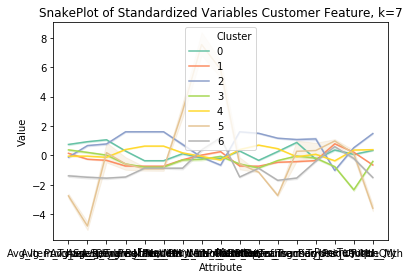

In [66]:
plt.title('SnakePlot of Standardized Variables Customer Feature, k=7')
customer_feat_k7=sns.lineplot(x='Attribute',y='Value',hue='Cluster',data=customer_feat_k7data_melt,legend='full',palette='Set2')

In [67]:
cluster_avg=datadf_7.groupby(['Cluster']).mean()
population_avg=datadf_7.mean()
customer_feat_k7_relative_imp=(cluster_avg/population_avg)-1

In [68]:
customer_feat_k7_relative_imp.round(2)
customer_feat_k7_relative_imp.drop('Cluster',axis=1,inplace=True)

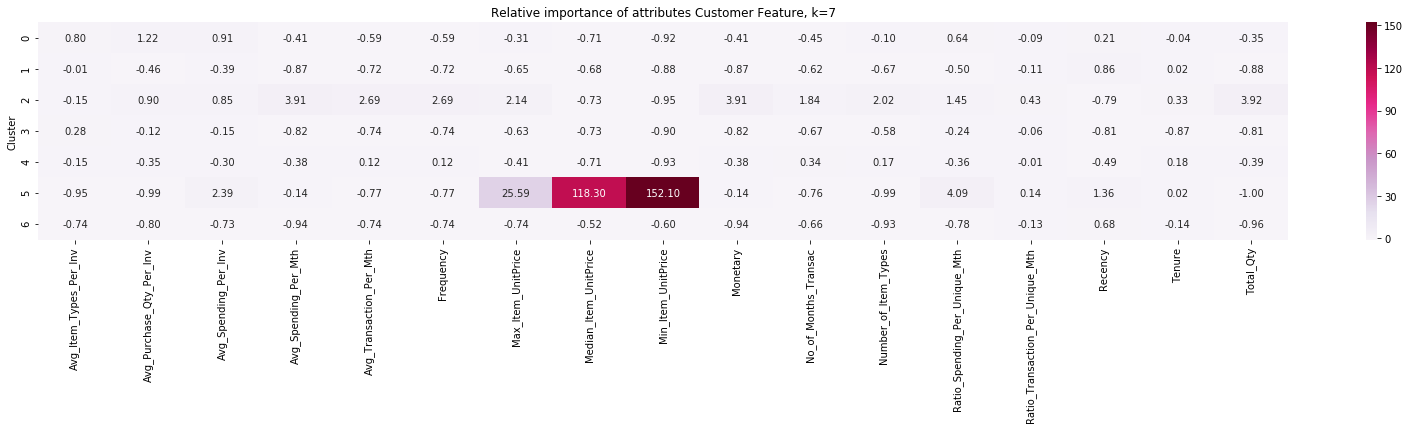

In [69]:
plt.figure(figsize=(28,4))
plt.title('Relative importance of attributes Customer Feature, k=7')
sns.heatmap(data=customer_feat_k7_relative_imp,annot=True,
           fmt='.2f',cmap='PuRd');

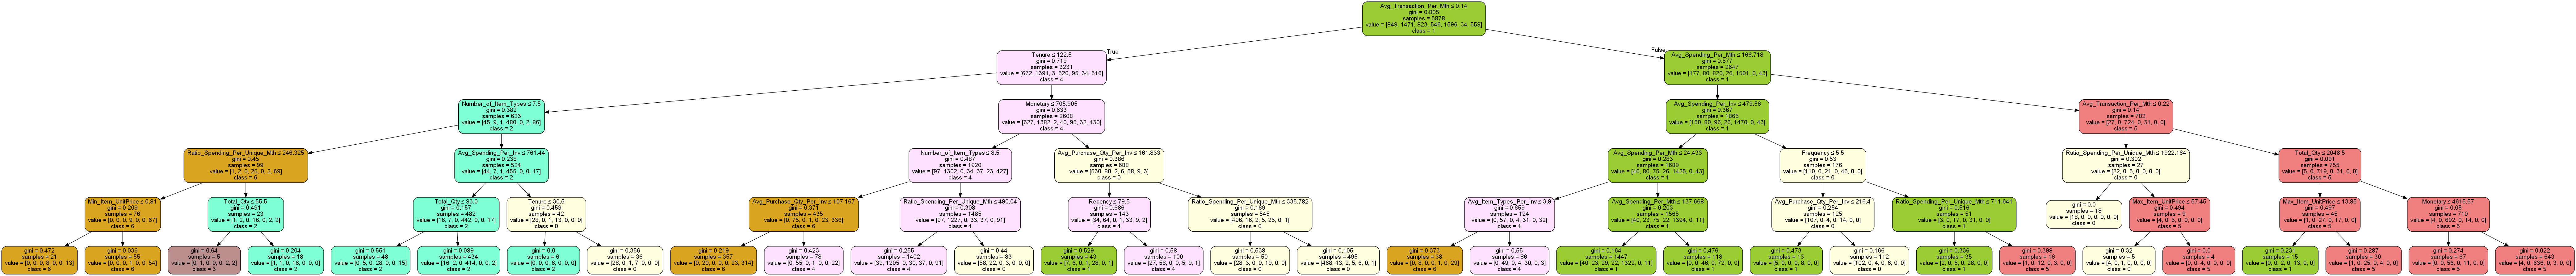

In [70]:
datadf_7['Cluster']=datadf_7["Cluster"].apply(str)

dt = tree.DecisionTreeClassifier(random_state = 101,max_depth=5)  
dt = dt.fit(datadf_7.iloc[:,1:17],datadf_7.iloc[:,17])

import pydotplus  
dot_data = tree.export_graphviz(dt, out_file=None)  
graph2 = pydotplus.graph_from_dot_data(dot_data)  
graph2.write_pdf("../tree/tree.pdf")  

from IPython.display import Image  
dot_data = tree.export_graphviz(dt, out_file=None,  
                     feature_names=list(datadf_7.iloc[:,1:17].columns),
                     class_names=list(set(datadf_7['Cluster'].values)),
                     filled=True, rounded=True,  # leaves_parallel=True, 
                     special_characters=True)  
graph2 = pydotplus.graph_from_dot_data(dot_data)

## Color of nodes
nodes = graph2.get_node_list()

for node in nodes:
    if node.get_label():
        values = [int(ii) for ii in node.get_label().split('value = [')[1].split(']')[0].split(',')];
        color = {0: [255,255,224], 1: [255,224,255], 2: [240,128,128],3: [127,255,212],4: [154,205,50],5: [188,143,143],6: [218,165,32],}
        values = color[values.index(max(values))]; # print(values)
        color = '#{:02x}{:02x}{:02x}'.format(values[0], values[1], values[2]); # print(color)
        node.set_fillcolor(color )

Image(graph2.create_png() ) 

http://webgraphviz.com/

https://www.html.am/html-codes/color/color-scheme.cfm?rgbColor=255,255,224